In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_set=np.array([1,2,3,4,5,6])

In [3]:
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0
    

In [4]:
X=[x_set,f]

In [5]:
prob=np.array([f(x_k) for x_k in x_set])

dict(zip(x_set,prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

In [6]:
np.sum(prob)

0.9999999999999999

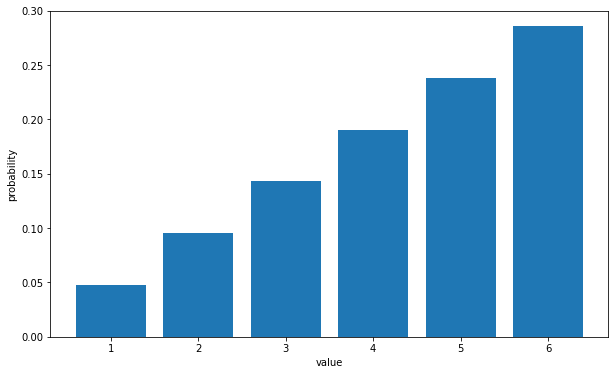

In [7]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.bar(x_set,prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

In [8]:
# 누적확률분포
def F(x):
    return np.sum([f(x) for x_k in x_set if x_k<=x])

In [9]:
F(3)

0.42857142857142855

In [10]:
# 확률변환
y_set=np.array([2*x_k +3 for x_k in x_set])
prob=np.array([f(x_k) for x_k in x_set])
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [11]:
np.sum([x_k*f(x_k) for x_k in x_set])

4.333333333333333

In [12]:
sample=np.random.choice(x_set,int(1e6),p=prob)
np.mean(sample)

4.331782

In [13]:
def E(X,g = lambda x: x):
    x_set,f=X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

In [14]:
E(X)

4.333333333333333

In [15]:
E(X,g=lambda x: 2*x+3).round(3)

11.667

In [16]:
# 분산
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set]).round(3)

2.222

In [17]:
# 2차원 이산형 확률분포
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [18]:
def f_XY(x,y):
    if 1<=y<=6 and 1<=x-y<=7:
        return y*(x-y)/441
    else:
        return 0


In [19]:
XY=[x_set,y_set,f_XY]

In [20]:
prob=np.array([[f_XY(x_i,y_j) for y_j in y_set] for x_i in x_set])

In [21]:
np.sum(prob)

1.238095238095238

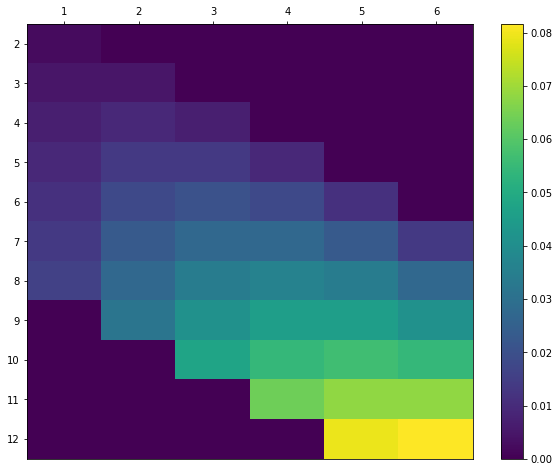

In [22]:
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)

c=ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1])+0.5)
ax.set_yticks(np.arange(prob.shape[0])+0.5)

ax.set_xticklabels(np.arange(1,7))
ax.set_yticklabels(np.arange(2,13))

ax.invert_yaxis()
ax.xaxis.tick_top()

fig.colorbar(c,ax=ax)
plt.show()

In [23]:
np.sum(prob)

1.238095238095238

In [24]:
def f_X(x):
    return np.sum([f_XY(x,y_j) for y_j in y_set])

In [25]:
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set ])

In [26]:
X=[x_set,f_X]
Y=[y_set,f_Y]

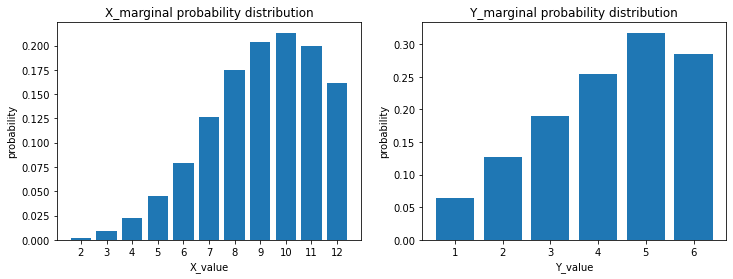

In [27]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [28]:
np.sum([x*f_XY(x,y) for x in x_set for y in y_set])

11.206349206349206

In [29]:
np.sum([y*f_XY(x,y) for x in x_set for y in y_set])

5.2063492063492065

In [30]:
def E(XY,g):
    x_set,y_set ,f_XY = XY
    return np.sum([g(x_i,y_j)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [31]:
XY

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([1, 2, 3, 4, 5, 6]),
 <function __main__.f_XY(x, y)>]

In [32]:
mean_X=E(XY,lambda x,y:x)
mean_X

11.206349206349206

In [33]:
mean_Y=E(XY,lambda x,y:y)
mean_Y

5.2063492063492065

In [34]:
np.sum([(x_i-mean_X)**2*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

11.334149179954165

In [35]:
def V(XY,g):
    x_set,y_set,f_XY=XY
    mean=E(XY,g)
    return np.sum([(g(x,y)-mean)**2*f_XY(x,y)
                  for x in x_set for y in y_set])

In [36]:
V(XY,g=lambda x,y:x)

11.334149179954165

In [37]:
V(XY,g=lambda x,y:y)

3.919183193559611

In [38]:
def Cov(XY):
    x_set,y_set,f_XY=XY
    mean_X=E(XY,g=lambda x,y:x)
    mean_Y=E(XY,g=lambda x,y:y)
    return np.sum([(x-mean_X)*(y-mean_Y)*f_XY(x,y) for x in x_set for y in y_set])

In [39]:
Cov(XY)

5.00761856770927